The business problem is to develop a machine learning model that can accurately classify emails into two categories: "spam" and "ham" (non-spam). The goal is to create a system that can automatically filter and flag spam emails, helping users to prioritize their inbox and reduce the risk of falling victim to scams.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('D:\\Python\\dataset\\mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


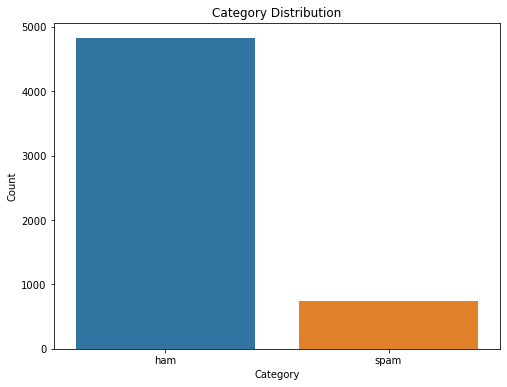

In [3]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

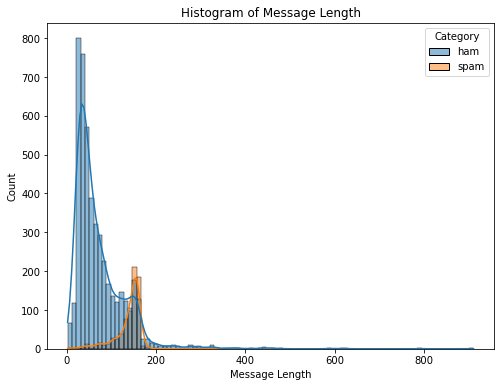

In [4]:
df['Message_Length'] = df['Message'].apply(lambda x: len(x))
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Message_Length', hue='Category', kde=True)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Histogram of Message Length')
plt.show()

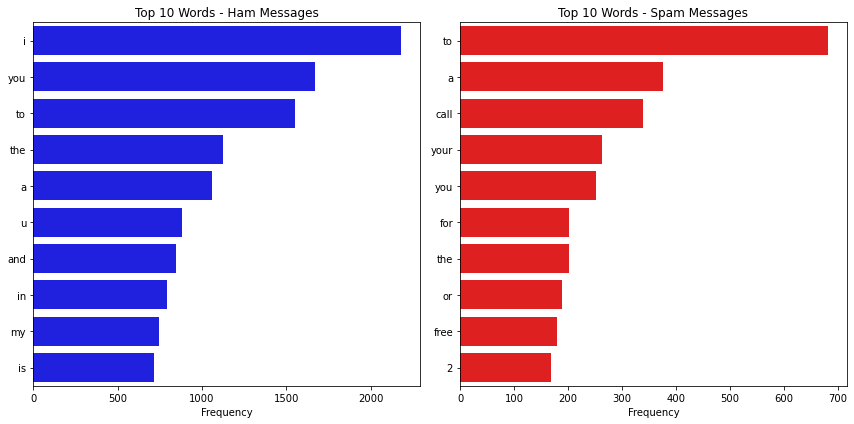

In [5]:
ham_word_freq = pd.Series(' '.join(df[df['Category'] == 'ham']['Message']).lower().split()).value_counts()[:10]
spam_word_freq = pd.Series(' '.join(df[df['Category'] == 'spam']['Message']).lower().split()).value_counts()[:10]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=ham_word_freq.values, y=ham_word_freq.index, color='blue')
plt.title('Top 10 Words - Ham Messages')
plt.xlabel('Frequency')

plt.subplot(1, 2, 2)
sns.barplot(x=spam_word_freq.values, y=spam_word_freq.index, color='red')
plt.title('Top 10 Words - Spam Messages')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

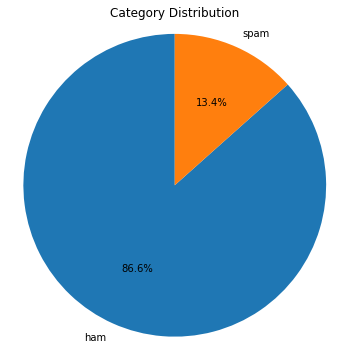

In [6]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')
plt.axis('equal')
plt.show()

# Text Cleaning

In [7]:
ps=PorterStemmer()

corpus=[]
for i in range (len(df)):
    rp=re.sub('[^a-zA-Z]'," ",df['Message'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[ps.stem(word)for word in rp if not word in set(stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)

# Vectorization

In [8]:
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [9]:
y=pd.get_dummies(df['Category'],drop_first=True)

## Train Test Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Modelling

In [11]:
model = MultinomialNB() 
model.fit(X_train, y_train)  

C:\Users\Shazeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

## Predictions

In [12]:
ypred_test=model.predict(X_test)
ypred_train=model.predict(X_train)

## Evaluation

In [13]:
print('Train Accuracy:', accuracy_score(y_train,ypred_train))
print('Test Accuracy:', accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9925641025641025
Test Accuracy: 0.9754784688995215


In [14]:
print('Classification Report - Test Data:')
print(classification_report(y_test, ypred_test))

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.88      0.95      0.91       224

    accuracy                           0.98      1672
   macro avg       0.93      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



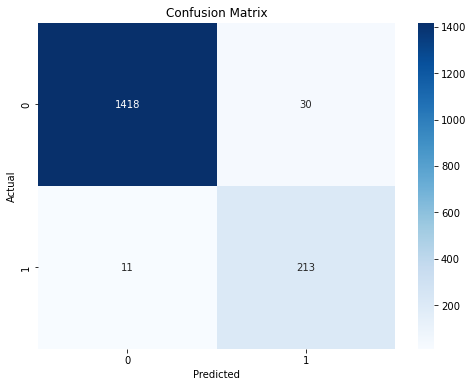

In [15]:
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Oue model has achieved a high train accuracy of 99.26% and test accuracy of 97.55%. The high train accuracy tells us that model has learned the patterns well of spam and ham categories. 
High test accuracy tells us that model generalizes well and can effectively classify new unseen emails. 
Overall our model demonstrates successful implementaion of email spam and ham classification with high accuracy.